<a href="https://colab.research.google.com/github/deepakagrawal/Pandas_Tutorial/blob/master/Data_Wrangling_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Clinic

The objective of python clinic is to 
- create a platform for all Python enthusiasts  
- provide learning resources for all members via this channel and offline. 

Join the slack channel [#topic-python-ds-ml](https://americanairlines.slack.com/messages/CJ7JNTUR4/)

# Python for Data Wrangling

We will use Titanic Survival prediction dataset as an example. We will focus on the data preparation step for this model.

Today we will cover following topics -

* Reading data files into Python
* What is a DataFrame?
* Accessing Main components of DataFrame
* How to add/remove columns/rows?
* How to handle `Missing values`?
* How to perform groupby/aggregation?
* How to apply a function to columns/rows?
* How to merge/join datasets?
* How to save data?
* How to handle large datasets?


## Problem

Titanic dataset provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. 

Let's start by importing some of the libraries we know we will need. 

* `pandas` -  This is the most important library for data wrangling in python
* `numpy` - Provides helpful mathematical functions
*`matplotlib` - A data visualization library to create plots 
* `seaborn` -  A visualization library based on `matplotlib`. Used to create more attractive plots more easily 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
file_path='https://raw.githubusercontent.com/deepakagrawal/Pandas_Tutorial/master/data/titanic.csv'

## Reading Data
### Use pandas to read the data into the dataframe

In [0]:
df = pd.read_csv(file_path)

## For csv file
# df = pd.read_csv("file.csv")

### Reading large data

`csv` file format is not ideal data format when handeling data of `>1GB`. In that case file formats such as `parquet` or `hdf5` are more suitable because read/write speeds are higher. Pandas supports all these formats.

If `csv` file formar is unavoidable reading data in chunk can help.

In [4]:
df1 = pd.read_csv(file_path, chunksize=500)
for chunk in df1:
  ## perform operation
  print(chunk.shape)

(500, 14)
(500, 14)
(309, 14)


In [5]:
df1 = pd.read_csv(file_path, memory_map=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB
None


### Reading from Mosaic

```python
##pyodbc is an open source library which makes accessing ODBC databases simple
import pyodbc

# getpass gets user name and password
import getpass
user_id=getpass.getuser()
print("connecting user : "+ user_id)
###################################################
# this assumes that in teradata your connection is saved as "MOSAIC_PROD"
connection = pyodbc.connect('DSN=MOSAIC_PROD;Uid=' + user_id + ';Pwd=' + getpass.getpass()) 
dat = pd.read_sql("select top 10 * from PROD_REFERENCE_DATA_VWS.AIRPORT_STATION",con=connection)

print(dat)

connection.close() 
```


For more details please visit [pandas io guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)

For connecting to mosaic from ORION server please visit [here](https://ghe.aa.com/00740677/ORION-python_pkgs)

## Data Exploration
Let's take a peek at the dataset and see what does the data look like.

In [6]:
df.shape ## Gives us size of the dataset. No. of rows and columns

(1309, 14)

In [7]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We see that each row of this dataset represent a single passenger. The definition of the columns is given below

| Column name | Definition |
|------------------------|-----------------|
|pclass | Class of Travel (1=1st; 2=2nd; 3=3rd)|
|survived | Survived or Not (0= No; 1=Yes)|
|name | Passenger Name |
|sex | Genger of the passenger|
| age | Age of the passenger|
| sibsb| Number of Sibling/Spouse aboard|
| parch | Number of Parent/Child aboard|
|fare | The fare which passenger paid for his/her ticket (British Pound)|
|cabin| The cabin which the passenger booked|
|embarked| The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown|
|boat| Lifeboat (if survived) |
|body | Body number (if did not survive and body was recovered)|
|home.dest|Home/Destination|



Our task is to predict whether the passenger survived or not. So the target column is **`Survived`**. Before we even start building the model we need to do some exploratory analysis to see which features might contribute to a passenger surviving or not.

Let's look at the data types of these columns. We use `DataFrame.info` method to print a concise summary of a DataFrame. We can print the column types, number of missing values and memory usage with this command

In [8]:
df.info(memory_usage=True) # This prints a concise summary of a DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


Above results shows us that 

1. Total 1309 rows and 14 columns in the DataFrame.
2. There are 4 columns with int64 entries, 3 columns with float64 and 7 columns are string or other objects
3. The total memory used by this dataframe is ~143 KB

Now let's look at the summary of the dataset to see some simple statistics

In [9]:
df.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


From above results we can see that 

1. `pclass` column has minimum 1 and maximum 3.
2. `survived` column has only minimum 0 and maximum 1. 
3. There are 1307 unique names. And we see that freq = 2. That means two passengers have multiple records
4. There are two values for `sex`. And majority are males (843) rest should be female (466)
5. Youngest person Aboard is 0.16 years old and oldest person is 80 years old.
6. The minimum number of Siblings/Sposes aboard are 0 and maximum are 8
7. The minimum number of Parents/Children aboard are 0 and maximum are 9
8. Several passengers were on the same ticket
9. The minimum Fare paid was 0 and maximum paid was 512.33
10. There are 186 unique cabins
11. There are 3 ports the passengers departed from. Contains 2 missing values
12. Total of 486 boats were used
13. Total of 182 bodies were recovered
14. Total of 745 destinations were registered

Let's look at what's happening with the duplicate names.

In [10]:
df[df.name.isin(df.name[df.name.duplicated()])]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


Since they paid different fare and their ages are different. We can assume that these are different passengers

### Creating new columns and deleting columns

Let's create a column which has the title of the passenger. We can create this column by separating it from the `Name` column. We see that Title is always the first value

In [11]:
df.name.head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [12]:
df['title'] = df.name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) # str.stip() removes all leading and trailing whitespaces
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


Now we can remove the name coulmn since we do not need it.

In [13]:
df.drop(columns=['name', 'ticket', 'body', 'boat', 'home.dest', 'cabin'], inplace=True)
print(df.columns.tolist())

['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'title']


### Creating summary tables (Groupby)

Let's find the number of passengers based on their Titles and gender

In [14]:
df.groupby(['sex', 'title']).size()

sex     title       
female  Dona              1
        Dr                1
        Lady              1
        Miss            260
        Mlle              2
        Mme               1
        Mrs             197
        Ms                2
        the Countess      1
male    Capt              1
        Col               4
        Don               1
        Dr                7
        Jonkheer          1
        Major             2
        Master           61
        Mr              757
        Rev               8
        Sir               1
dtype: int64

We can reassign `Mlle`, `Ms` as `Miss` and `Mme` as `Mrs`.

In [15]:
df.loc[df.title.isin(['Mlle', 'Ms']), 'title'] = 'Miss'
df.loc[df.title == 'Mme', 'title'] = 'Mrs'
df.groupby(['sex', 'title']).size()

sex     title       
female  Dona              1
        Dr                1
        Lady              1
        Miss            264
        Mrs             198
        the Countess      1
male    Capt              1
        Col               4
        Don               1
        Dr                7
        Jonkheer          1
        Major             2
        Master           61
        Mr              757
        Rev               8
        Sir               1
dtype: int64

Let's look at by title what is the likelihood of surviving

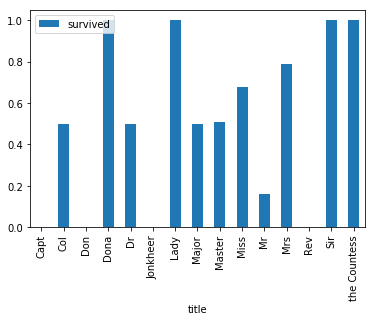

In [16]:
df[["survived", "title"]].groupby("title").mean().plot(kind='bar')

We see that passengers with title `Mr` had the lowest survival rate. On the other hand Miss and Mrs had higher survival rate.

Now let's look at survival rate by number of family members.

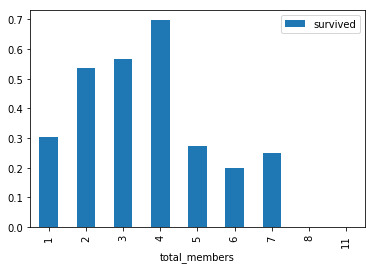

In [17]:
df["total_members"] = df.sibsp + df.parch + 1
df[["survived", "total_members"]].groupby('total_members').mean().plot(kind='bar')

We can see passengers with family size more than 4 or single passengers had a low survival rate compared to others.


## Data cleaning

### Missing values

Let's look at the total number of missing values by each column and see how can we handle them

In [18]:
df.isna().sum(axis=0)

pclass             0
survived           0
sex                0
age              263
sibsp              0
parch              0
fare               1
embarked           2
title              0
total_members      0
dtype: int64

There are three ways we can handle missing values - 

* Remove the observation (row) or the column
* Impute missing value
* Treat missing value as an new categorical level

##### Embarked
Now let's look at the missing values in `embarked` column

In [19]:
df[df.embarked.isna()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,total_members
168,1,1,female,38.0,0,0,80.0,NaN,Miss,1
284,1,1,female,62.0,0,0,80.0,NaN,Mrs,1


Let's look at the relationship of `embarked`, `fare` and `survived`

In [20]:
df[['embarked', 'survived', 'fare']].groupby(['embarked']).mean()

,survived,fare
embarked,,
C,0.555556,62.336267
Q,0.357724,12.409012
S,0.332604,27.418824


We can see that passengers who embarked from `C` had the highest survival rate and highest fare. Since, the two passengers with missing value for `embarked` have fare of 80 £ and survived so we can impute the missing value as `C`

In [0]:
df.loc[(df.embarked.isna()), "embarked"] = 'C'

##### Fare 
Now Let's look at the record having missing `fare` value

In [22]:
df[df.fare.isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,total_members
1225,3,0,male,60.5,0,0,NaN,S,Mr,1


Let's try to imupte the missing fare. Let's see which columns are correlated with fare. 

   pclass embarked        fare
0       1        C  106.469871
1       1        Q   90.000000
2       1        S   72.148094
3       2        C   23.300593
4       2        Q   11.735114
5       2        S   21.206921
6       3        C   11.021624
7       3        Q   10.390820
8       3        S   14.435422


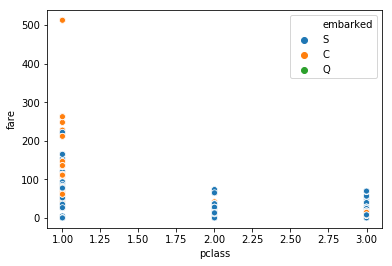

In [23]:
fare_by_class_embarked = df.groupby(['pclass', 'embarked'])['fare'].mean().reset_index()
sns.scatterplot(x='pclass', hue='embarked', y='fare', data=df)
print(fare_by_class_embarked)

We see that for passengers of `pclass`=`3` who embarked from `S` the average fare was 14.43, so we can use that fare to impute the missing fare value.

In [0]:
df.loc[(df.fare.isnull()) & (df.pclass==3) & (df.embarked=="S"), "fare"] = df.loc[(df.pclass==3) & (df.embarked=="S"), "fare"].mean()

##### Age
Now let's take care of the missing values in `age`. Let's see age distribution first

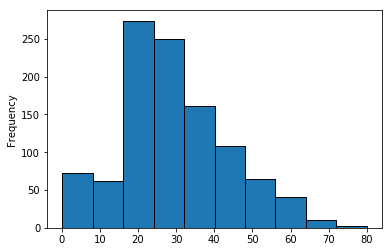

In [25]:
df.age.plot(kind='hist', edgecolor='black')

**Using seaborn to create visualizations**

Let's see similar plot created using `seaborn` library

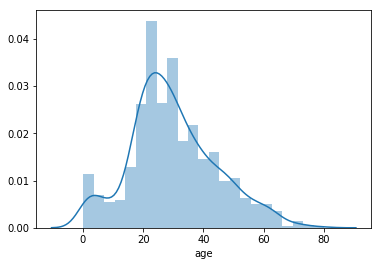

In [26]:
sns.distplot(df.age[~df.age.isna()])

Age can be predicted based of `title` and `sex` of existing customers and imputing the median age value. Let's first create a scatter plot to see the relationship

[Text(0, 0, 'Miss'),
 Text(0, 0, 'Master'),
 Text(0, 0, 'Mr'),
 Text(0, 0, 'Mrs'),
 Text(0, 0, 'Col'),
 Text(0, 0, 'Dr'),
 Text(0, 0, 'Major'),
 Text(0, 0, 'Capt'),
 Text(0, 0, 'Lady'),
 Text(0, 0, 'Sir'),
 Text(0, 0, 'Dona'),
 Text(0, 0, 'Jonkheer'),
 Text(0, 0, 'the Countess'),
 Text(0, 0, 'Don'),
 Text(0, 0, 'Rev')]

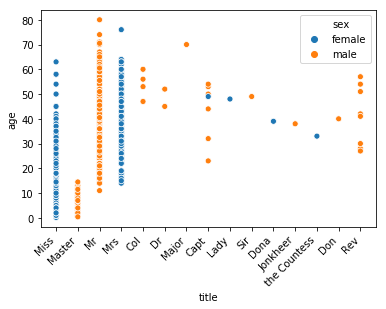

In [27]:
labels = df.title.unique()
p = sns.scatterplot(x="title", y="age", hue="sex", data=df)
p.set_xticklabels(labels, rotation=45, horizontalalignment='right')

We see that there is a clear relationship between `age` and the combination of `sex`, `title`. Let's see this relationship using a `pivot table`.

In [28]:
age_pivot_table = df.pivot_table(index=['sex', 'title'], values=['age'], aggfunc='median')
print(age_pivot_table)

                      age
sex    title             
female Dona          39.0
       Dr            49.0
       Lady          48.0
       Miss          22.0
       Mrs           35.0
       the Countess  33.0
male   Capt          70.0
       Col           54.5
       Don           40.0
       Dr            47.0
       Jonkheer      38.0
       Major         48.5
       Master         4.0
       Mr            29.0
       Rev           41.5
       Sir           49.0


**Imputing missing value with merging Dataframes**

Now there are 2 ways we can impute the missing values in the `age` column - 
1. Write a long if else loop to impte the values.
2. Use `merge` operation to do it more effectively

In [29]:
df_age_imputed = df[df.age.isna()].drop(columns='age').merge(age_pivot_table.reset_index(), on=['sex', 'title'], how='left')
print(df_age_imputed.shape)
df_age_imputed.head()


(263, 10)


,pclass,survived,sex,sibsp,parch,fare,embarked,title,total_members,age
0,1,0,male,0,0,25.9250,S,Mr,1,29.0
1,1,1,male,0,0,26.5500,S,Mr,1,29.0
2,1,0,male,0,0,39.6000,C,Dr,1,47.0
3,1,0,male,0,0,31.0000,S,Mr,1,29.0
4,1,1,female,0,0,27.7208,C,Mrs,1,35.0


In [0]:
df = pd.concat([df[~df.age.isna()], df_age_imputed], ignore_index=True, sort=False)

Now let's look at the `age` distribution after imputation

In [31]:
df[df.age.isna()].shape

(0, 10)

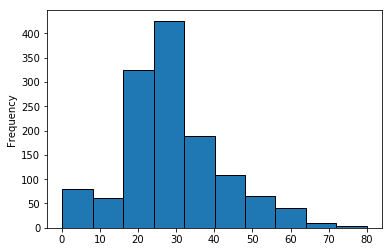

In [32]:
df.age.plot(kind='hist', edgecolor='black')

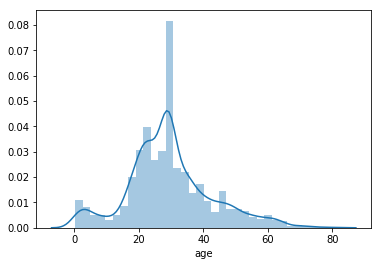

In [33]:
sns.distplot(df.age)

### Convert objects to numeric

Most machine learning libraries in python require that the columns/features used are numeric. Let's see the data types of our data.

In [34]:
df.dtypes

pclass             int64
survived           int64
sex               object
age              float64
sibsp              int64
parch              int64
fare             float64
embarked          object
title             object
total_members      int64
dtype: object

We can see that `sex`, `embarked`, `title`are categorical values. 

Note: pandas assumes that string are also object.

pandas provides a function to convert categorical variable into dummy/indicator variables

In [35]:
pd.get_dummies(df).head() # by default pandas converts all string/categorical columns to dummy columns. So we should be careful when converting categorical columns to dummy columns.

,pclass,survived,age,sibsp,parch,fare,total_members,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Capt,title_Col,title_Don,title_Dona,title_Dr,title_Jonkheer,title_Lady,title_Major,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_Sir,title_the Countess
0,1,1,29.0000,0,0,211.3375,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0.9167,1,2,151.5500,4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,2.0000,1,2,151.5500,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,30.0000,1,2,151.5500,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,25.0000,1,2,151.5500,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
df = pd.get_dummies(df, columns=['sex', 'embarked', 'title'], drop_first=True)
## if we have missing values in our dataset and instead of imputing it we can assign a new dummy level for the same. Example: title_NA
## drop_first = True drops the first level. This is sometimes required to maintain linear independence assumption in linear regression. 

### Saving python objects to pickle

Any object in python can be pickled so that it can be saved on disk. For example it can be a list, function, dataframe or a calibrated machine learning model. Let's save the dataframe we have created to a pickle file.

In [0]:
import pickle

with open("titanic_processed.pkl", "wb") as f:
  pickle.dump(df, f)

### Reducing Memory usage

Now let's see the memory usage for individual column. 

**Note:** This is useful if you have a large dataset and not enough RAM to handle it.

In [38]:
df.memory_usage(index=False)

pclass                10472
survived              10472
age                   10472
sibsp                 10472
parch                 10472
fare                  10472
total_members         10472
sex_male               1309
embarked_Q             1309
embarked_S             1309
title_Col              1309
title_Don              1309
title_Dona             1309
title_Dr               1309
title_Jonkheer         1309
title_Lady             1309
title_Major            1309
title_Master           1309
title_Miss             1309
title_Mr               1309
title_Mrs              1309
title_Rev              1309
title_Sir              1309
title_the Countess     1309
dtype: int64

We can see that all of the columns are using ~10 KB memory. Let's see if we can try to reduce some memory by changing data types of some columns. From the summary results we saw that `Survived` had binary values. Let's see if we convert them to binary how much memory can we save

In [39]:
df.survived.astype('int8').memory_usage()

1389

We can see that by converting the `Survived` column to `int8` from `int64` we reduced the memory usage to 1389 B only. Similarly we can convert `pclass`,  `sibsp` and `parch` columns to `int8`. 

We can also convert `age` and `fare` column to `float32` if we don't need age with more than 3 digits after decimal. Instead of making these changes after read the whole file. We can make these changes at the time of reading the csv file.

In [0]:
df = pd.read_csv(file_path, 
                 dtype={'survived': 'int8', 'pclass': 'int8', 'age':'float32', 'sibsp': 'int8', 'parch': 'int8', 'fare':'float32', 'sex': 'category', 'pclass': 'category', 'embarked': 'category'})

In [42]:
df.memory_usage(index=False)

pclass        1333
survived      1309
name         10472
sex           1325
age           5236
sibsp         1309
parch         1309
ticket       10472
fare          5236
cabin        10472
embarked      1413
boat         10472
body         10472
home.dest    10472
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null category
survived     1309 non-null int8
name         1309 non-null object
sex          1309 non-null category
age          1046 non-null float32
sibsp        1309 non-null int8
parch        1309 non-null int8
ticket       1309 non-null object
fare         1308 non-null float32
cabin        295 non-null object
embarked     1307 non-null category
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: category(3), float32(2), float64(1), int8(3), object(5)
memory usage: 79.5+ KB


We can see that we have reduced the memory used to 79.5 KB

We see that there are several columns with missing values. e.g. age, fare, cabin, embarked, boat, body and home.dest

### Additional Resources

https://pandas.pydata.org/pandas-docs/stable/index.html